In [60]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.spatial import Delaunay , Voronoi, voronoi_plot_2d
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

In [24]:
points = np.array([(randint(0, 100), randint(0, 100)) for _ in range(50)])

In [40]:
triangles = Delaunay(points)
vor = Voronoi(points)

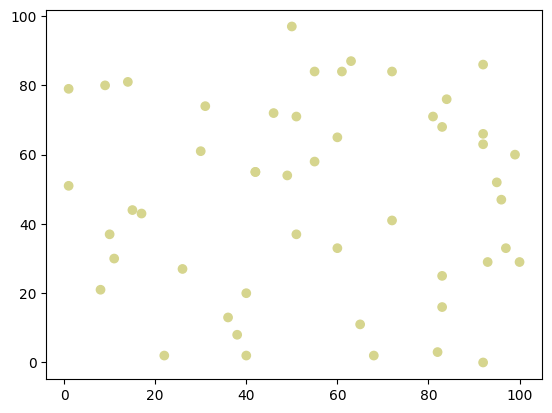

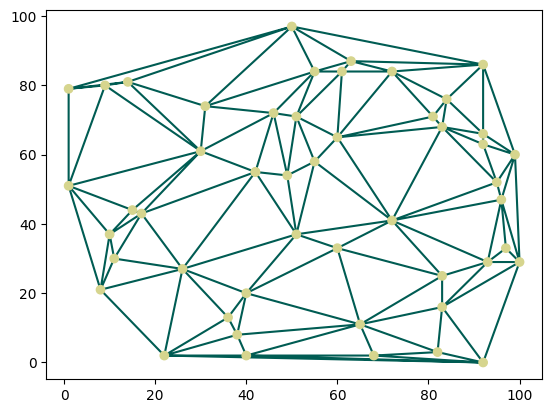

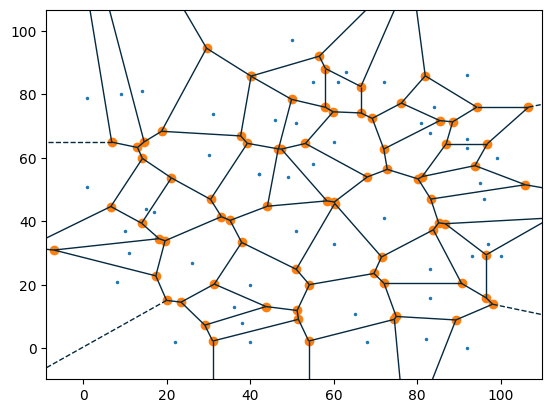

In [200]:
plt.scatter(points[:,0],points[:,1] , color=["#D6D58E"]*len(points))
plt.savefig('../images/points.svg', transparent=True)
plt.show()
plt.triplot(points[:,0],points[:,1],triangles.simplices,color="#005C53")
plt.scatter(points[:,0],points[:,1] , color=["#D6D58E"]*len(points))
plt.savefig('../images/delaunay_diagram.svg', transparent=True)
plt.show()
voronoi_plot_2d(vor, line_colors="#042940", point_size=3)
plt.savefig('../images/voronoi_diagram.svg', transparent=True)
plt.show()

In [188]:
interior_points = []
for rigde in vor.ridge_vertices:
    if rigde[0] >= 0 and rigde[1]>= 0 : 
        interior_points.append(rigde)
max_indices = np.array(interior_points).flatten().max()     
adj_matrix = np.zeros((max_indices+1,max_indices+1))

In [154]:
vor.ridge_vertices

[[7, 8],
 [7, 9],
 [8, 10],
 [9, 10],
 [11, 13],
 [11, 12],
 [12, 14],
 [13, 14],
 [0, 12],
 [0, 17],
 [11, 18],
 [17, 18],
 [-1, 0],
 [-1, 19],
 [14, 20],
 [19, 20],
 [27, 29],
 [27, 28],
 [28, 30],
 [29, 31],
 [30, 31],
 [6, 7],
 [6, 30],
 [8, 28],
 [34, 37],
 [34, 38],
 [35, 39],
 [35, 36],
 [36, 37],
 [38, 41],
 [39, 40],
 [40, 41],
 [17, 39],
 [18, 35],
 [13, 33],
 [33, 36],
 [29, 38],
 [31, 41],
 [-1, 40],
 [-1, 6],
 [42, 46],
 [42, 44],
 [43, 44],
 [43, 45],
 [45, 46],
 [15, 16],
 [15, 32],
 [16, 42],
 [32, 37],
 [34, 46],
 [27, 45],
 [47, 48],
 [47, 49],
 [48, 51],
 [49, 50],
 [50, 51],
 [19, 51],
 [20, 48],
 [-1, 50],
 [-1, 23],
 [-1, 5],
 [4, 5],
 [4, 54],
 [23, 55],
 [54, 55],
 [33, 57],
 [47, 56],
 [56, 57],
 [32, 58],
 [57, 58],
 [9, 61],
 [10, 59],
 [59, 61],
 [43, 60],
 [59, 60],
 [-1, 62],
 [61, 62],
 [63, 65],
 [63, 64],
 [64, 66],
 [65, 66],
 [3, 4],
 [3, 65],
 [5, 63],
 [-1, 2],
 [2, 26],
 [26, 64],
 [24, 25],
 [24, 66],
 [25, 26],
 [67, 68],
 [67, 69],
 [68, 70],
 [

In [189]:
for rigde in interior_points:
    id1 , id2 = rigde[0], rigde[1]
    adj_matrix[id1, id2] = np.linalg.norm(np.array(vor.vertices[id2]) - np.linalg.norm(vor.vertices[id1]))
    adj_matrix[id2, id1] = np.linalg.norm(np.array(vor.vertices[id1]) - np.linalg.norm(vor.vertices[id2]))


In [190]:
graph = csr_matrix(adj_matrix)

In [191]:
print(graph)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 252 stored elements and shape (87, 87)>
  Coords	Values
  (0, 12)	29.729071151791373
  (0, 17)	41.69143356437826
  (1, 2)	74.8156770766807
  (1, 77)	92.62507928592673
  (1, 79)	86.36136469929255
  (2, 1)	102.29765112962158
  (2, 26)	94.27608130962005
  (3, 4)	42.38990606061572
  (3, 65)	55.97255043270531
  (3, 69)	50.56265589617015
  (4, 3)	59.43553707128407
  (4, 5)	47.3286023739628
  (4, 54)	52.659512694939124
  (5, 4)	66.08290214952376
  (5, 63)	74.72223830880291
  (6, 7)	1490.5095178883905
  (6, 30)	1262.8599346302285
  (7, 6)	1257.299955724422
  (7, 8)	408.2056348782705
  (7, 9)	420.3369146541596
  (8, 7)	365.0503914913558
  (8, 10)	49.32535804608392
  (8, 28)	44.94222410627858
  (9, 7)	395.28299210800327
  (9, 10)	74.53545687596801
  :	:
  (78, 80)	52.6641586988958
  (79, 1)	56.629907222187995
  (79, 77)	65.70431614009001
  (79, 80)	56.53244638957734
  (80, 25)	47.9972131470988
  (80, 78)	57.366873715006705
  (80, 79)	

In [192]:
index_end = 85
dist_matrix , predecessors = dijkstra(csgraph=graph , directed=False, return_predecessors=True, indices=index_end)

In [193]:
predecessors

array([   17,    79,    26,     4,    54,     4,    30,     8,    28,
          10,     8,    13,    11,    33,    13,    73,    15,    39,
          35,    20,    48,    22,    72,    83,    21,    24,    25,
          29,    30,    38,    31,    41,    58,    57,    37,    36,
          33,    32,    34,    35,    39,    40,    46,    45,    42,
          46,    34,    49,    47,    85,    49,    48,    53,    84,
          55,    23,    86,    56,    57,    60,    43,    59,    75,
           5,    63,     3,    65,    68,    52,    70,    54,    81,
          71,    74,    82,    76,    78,    79,    44,    80,    78,
          84,    86,    85,    83, -9999,    85], dtype=int32)

algorith took 12 iterations


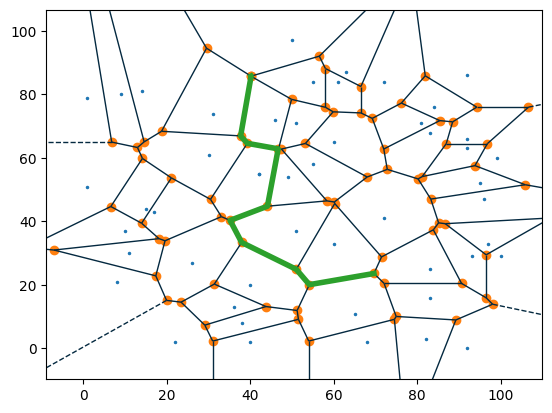

In [212]:
index_start  = 60
n_iterations = 0
path_x = []
path_y = []
voronoi_plot_2d(vor, line_colors="#042940", point_size=3)
while index_start != -9999 :
    next_el =  predecessors[index_start]
    if next_el >=0 :
        point = vor.vertices[next_el]
        path_x.append(point[0])
        path_y.append(point[1])
    index_start = next_el
    n_iterations += 1
plt.plot(path_x, path_y , linewidth = 4)
plt.savefig('../images/voronoi_shortest_path_diagram.svg', transparent=True)
print(f"algorith took {n_iterations} iterations")
plt.show()